<a href="https://colab.research.google.com/github/Yash12100/Data_science/blob/master/Mobile_sensor_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
train_a=pd.read_csv('https://raw.githubusercontent.com/Yash12100/Data_science/master/train1.csv')
train_b=pd.read_csv('https://raw.githubusercontent.com/Yash12100/Data_science/master/train2.csv')
test=pd.read_csv('https://raw.githubusercontent.com/Yash12100/Data_science/master/test.csv')
train=pd.concat([train_a, train_b, test]).reset_index(drop=True)
print(train.shape)
train_copy=train.copy()

(10299, 563)


In [6]:
train_copy.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.271844,-0.010203,-0.124157,-0.989819,-0.984381,-0.979815,-0.990699,-0.983698,-0.978368,-0.937613,-0.561813,-0.820056,0.839182,0.692078,0.831441,-0.980890,-0.999898,-0.999807,-0.999167,-0.991481,-0.984326,-0.974661,-0.569363,-0.381483,-0.737098,-0.016667,0.128967,-0.111175,-0.117656,0.219605,-0.152539,0.120428,0.013042,-0.236866,0.257266,-0.192485,-0.096755,0.488857,-0.380272,-0.452992,...,-1.0,-0.650794,0.562790,-0.750130,-0.949139,-0.993042,-0.992413,-0.991103,-0.992750,-0.997301,-0.993042,-0.999940,-0.990063,-0.850310,-1.0,0.000819,-0.474356,-0.752845,-0.994723,-0.994570,-0.994242,-0.995119,-0.994470,-0.994723,-0.999970,-0.994658,-0.955696,-0.904762,0.445110,-0.350853,-0.713696,0.060629,0.797917,0.318182,-0.578666,0.371511,-0.525097,-0.446015,17,LAYING
1,0.273342,-0.016478,-0.106394,-0.990812,-0.972099,-0.963879,-0.991005,-0.968943,-0.958965,-0.937613,-0.561813,-0.812154,0.845401,0.686116,0.831441,-0.977197,-0.999915,-0.999744,-0.998910,-0.990838,-0.971442,-0.941337,-0.556757,-0.446539,-0.413303,0.003234,0.061783,-0.004708,-0.170593,0.217867,-0.213274,0.238516,-0.118373,0.182095,-0.145678,0.235560,-0.432155,0.694198,-0.664999,-0.832562,...,-1.0,-0.650794,0.511308,-0.646715,-0.944340,-0.991158,-0.985302,-0.988527,-0.983915,-0.993718,-0.991158,-0.999858,-0.992613,-0.797549,-1.0,-0.189639,0.135421,-0.233146,-0.996613,-0.996863,-0.996287,-0.997741,-0.994671,-0.996613,-0.999985,-0.995332,-1.000000,-0.873016,0.531282,-0.614411,-0.880521,-0.259070,-0.018589,-0.293882,-0.360668,0.372782,-0.529960,-0.441233,17,LAYING
2,0.262356,-0.023552,-0.088039,-0.994763,-0.989075,-0.984267,-0.994526,-0.989412,-0.981547,-0.944033,-0.575289,-0.804820,0.844227,0.686116,0.849811,-0.982234,-0.999918,-0.999861,-0.999065,-0.994615,-0.991230,-0.977742,-0.888215,-0.847055,-0.223534,0.131681,-0.070851,0.015082,-0.157529,0.102155,-0.051303,0.043313,0.023234,0.213587,-0.127425,0.193110,-0.440547,0.478551,-0.463109,-0.551919,...,-1.0,-0.936508,0.635237,-0.748732,-0.936805,-0.990435,-0.980689,-0.987405,-0.977030,-0.991377,-0.990435,-0.999787,-0.995584,-0.836875,-1.0,-0.08671

In [31]:
hello=pd.Series([x.split('-')[0].split('(')[0] for x in train.columns]).value_counts()
hello

fBodyGyro               79
fBodyAcc                79
fBodyAccJerk            79
tBodyAcc                40
tGravityAcc             40
tBodyAccJerk            40
tBodyGyro               40
tBodyGyroJerk           40
tBodyGyroJerkMag        13
tBodyAccJerkMag         13
tBodyAccMag             13
tGravityAccMag          13
fBodyBodyGyroMag        13
fBodyAccMag             13
fBodyBodyGyroJerkMag    13
fBodyBodyAccJerkMag     13
tBodyGyroMag            13
angle                    7
dtype: int64

In [8]:
train.isnull().sum().sum()

0

In [9]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.271844,-0.010203,-0.124157,-0.989819,-0.984381,-0.979815,-0.990699,-0.983698,-0.978368,-0.937613,-0.561813,-0.820056,0.839182,0.692078,0.831441,-0.980890,-0.999898,-0.999807,-0.999167,-0.991481,-0.984326,-0.974661,-0.569363,-0.381483,-0.737098,-0.016667,0.128967,-0.111175,-0.117656,0.219605,-0.152539,0.120428,0.013042,-0.236866,0.257266,-0.192485,-0.096755,0.488857,-0.380272,-0.452992,...,-1.0,-0.650794,0.562790,-0.750130,-0.949139,-0.993042,-0.992413,-0.991103,-0.992750,-0.997301,-0.993042,-0.999940,-0.990063,-0.850310,-1.0,0.000819,-0.474356,-0.752845,-0.994723,-0.994570,-0.994242,-0.995119,-0.994470,-0.994723,-0.999970,-0.994658,-0.955696,-0.904762,0.445110,-0.350853,-0.713696,0.060629,0.797917,0.318182,-0.578666,0.371511,-0.525097,-0.446015,17,LAYING
1,0.273342,-0.016478,-0.106394,-0.990812,-0.972099,-0.963879,-0.991005,-0.968943,-0.958965,-0.937613,-0.561813,-0.812154,0.845401,0.686116,0.831441,-0.977197,-0.999915,-0.999744,-0.998910,-0.990838,-0.971442,-0.941337,-0.556757,-0.446539,-0.413303,0.003234,0.061783,-0.004708,-0.170593,0.217867,-0.213274,0.238516,-0.118373,0.182095,-0.145678,0.235560,-0.432155,0.694198,-0.664999,-0.832562,...,-1.0,-0.650794,0.511308,-0.646715,-0.944340,-0.991158,-0.985302,-0.988527,-0.983915,-0.993718,-0.991158,-0.999858,-0.992613,-0.797549,-1.0,-0.189639,0.135421,-0.233146,-0.996613,-0.996863,-0.996287,-0.997741,-0.994671,-0.996613,-0.999985,-0.995332,-1.000000,-0.873016,0.531282,-0.614411,-0.880521,-0.259070,-0.018589,-0.293882,-0.360668,0.372782,-0.529960,-0.441233,17,LAYING
2,0.262356,-0.023552,-0.088039,-0.994763,-0.989075,-0.984267,-0.994526,-0.989412,-0.981547,-0.944033,-0.575289,-0.804820,0.844227,0.686116,0.849811,-0.982234,-0.999918,-0.999861,-0.999065,-0.994615,-0.991230,-0.977742,-0.888215,-0.847055,-0.223534,0.131681,-0.070851,0.015082,-0.157529,0.102155,-0.051303,0.043313,0.023234,0.213587,-0.127425,0.193110,-0.440547,0.478551,-0.463109,-0.551919,...,-1.0,-0.936508,0.635237,-0.748732,-0.936805,-0.990435,-0.980689,-0.987405,-0.977030,-0.991377,-0.990435,-0.999787,-0.995584,-0.836875,-1.0,-0.08671

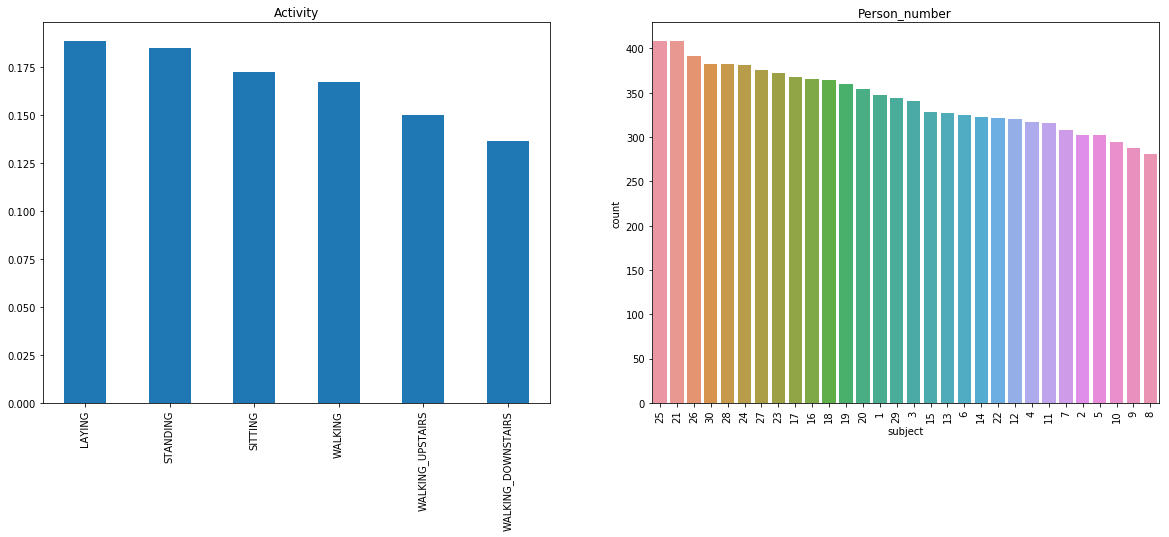

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
train['Activity'].value_counts(normalize=True).plot.bar(title='Activity')
plt.grid(False)
axx=plt.subplot(1,2,2)
color_map= plt.cm.nipy_spectral
axx.set_prop_cycle('color', [color_map(i) for i in np.linspace(0,1,10)])
train['subject'].value_counts(normalize=True).plot.bar(title='Person_number')
sns.countplot(x='subject', data=train, order= train['subject'].value_counts().index)
plt.grid(False)
plt.show()

# ***Grouping is Possible***

In [0]:
label=train.pop('Activity')
Subject_data=train.pop('subject')

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
scaler= StandardScaler()
scaler_data=scaler.fit_transform(train)
pca= PCA(n_components=0.9, random_state=3)
pca_data= pca.fit_transform(scaler_data)
tsne=TSNE(random_state=3)
tsne_data=tsne.fit_transform(scaler_data)
#scaler_data
pca_data


array([[-16.09974774,   4.01533135,   1.98925673, ...,   0.15115463,
         -0.16549461,  -0.70863678],
       [-16.56518733,   2.70072838,   4.05676832, ...,   0.09412534,
         -0.27253354,  -0.82285136],
       [-16.62492813,   4.42199562,   2.85580417, ...,   0.85659035,
          1.30338883,  -0.34235181],
       ...,
       [ 11.84685312,  -3.43356502,   2.18801926, ...,  -0.94467046,
         -0.34497972,  -2.09465647],
       [  8.20668637,  -4.38648876,   1.31871955, ...,   0.11723445,
         -1.32786056,   0.08742446],
       [  9.31117251,  -3.98616133,   1.93301747, ...,   0.12988204,
         -1.86396408,  -0.18253505]])

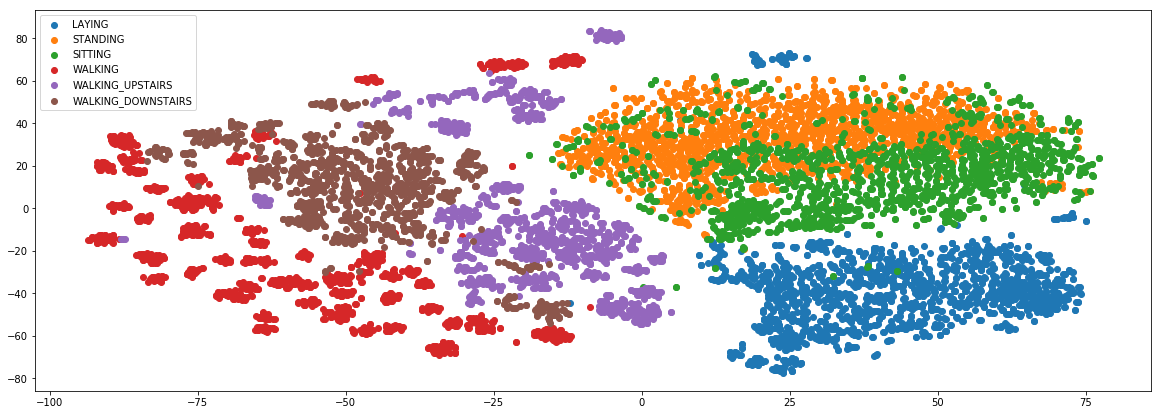

In [27]:
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
plt.figure(figsize=(20,7))
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]
for i in label.value_counts().index:
  plt_data=tsne_data[(label==i).values]
  plt.scatter(plt_data[:,0], plt_data[:,1],label=i)
 
plt.legend()
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier as rsk
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
x= train
y= label
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)


In [29]:
log=LogisticRegression()
log.fit(x_train, y_train)
y_pred= log.predict(x_test)
score=accuracy_score(y_test, y_pred)
print(score)

0.982200647249191


In [30]:
log=KNeighborsClassifier(n_neighbors=5)
log.fit(x_train, y_train)
y_pred= log.predict(x_test)
score=accuracy_score(y_test, y_pred)
print(score)

0.96084142394822


In [0]:
log=rsk()
log.fit(x_train, y_train)
y_pred= log.predict(x_test)
score=accuracy_score(y_test, y_pred)
print(score)

0.9640776699029127


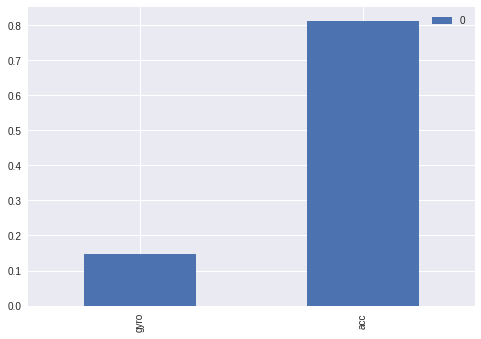

In [0]:
dict_1={'columns_name': train.columns, 'impor':log.feature_importances_ }
importance= {'gyro': 0, 'acc': 0}
for name, value in zip( train.columns,log.feature_importances_):
  if 'Gyro' in name:
    importance['gyro']+= value
  if "Acc" in name:
    importance['acc']+= value
plot_data_1= pd.DataFrame.from_dict(importance, orient='index')
plot_data_1.plot.bar()
plt.show()

**Now checking for Person Catagory**






In [0]:
y= Subject_data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)
log=LogisticRegression()
log.fit(x_train, y_train)
y_pred= log.predict(x_test)
score=accuracy_score(y_test, y_pred)
print(score)

0.7


***Now if we know the Activity 'Can we identify the person'***

In [0]:
for i in label.value_counts().index:
  data_set= train[label==i]
  y=Subject_data[label==i]
  x_train, x_test, y_train, y_test= train_test_split(data_set,y, test_size=0.3)
  log=LogisticRegression()
  log.fit(x_train, y_train)
  y_pred= log.predict(x_test)
  score=accuracy_score(y_test, y_pred)
  print(i,' : ',score)


LAYING  :  0.8013698630136986
STANDING  :  0.6118881118881119
SITTING  :  0.5580524344569289
WALKING  :  1.0
WALKING_UPSTAIRS  :  1.0
WALKING_DOWNSTAIRS  :  0.990521327014218


***Time for  starirs***

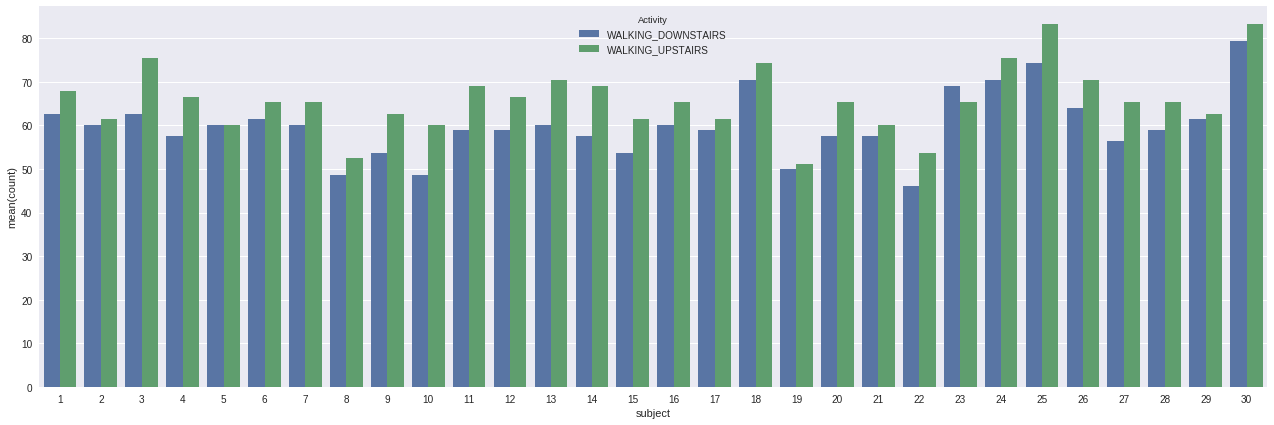

In [0]:
plt.figure(figsize=(22,7))
train_copy['extra']='ext'
data_modified=(train_copy.groupby(['Activity','subject'])['extra'].count()*1.28)[['WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']].reset_index()
data_modified.columns=['Activity','subject','count']
import seaborn as sns
sns.barplot('subject','count',data=data_modified, hue='Activity')
plt.show()


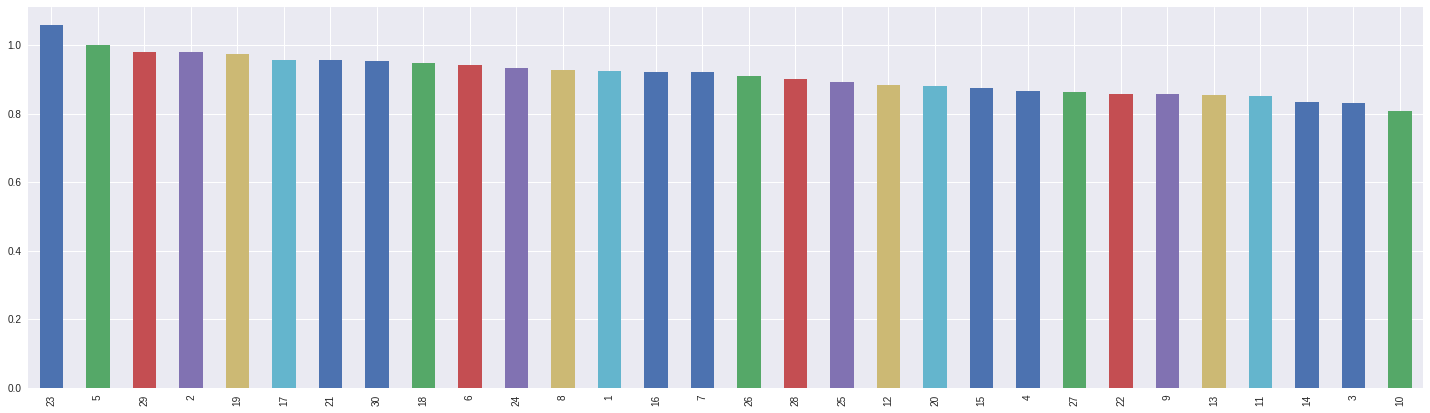

In [0]:
plt.figure(figsize=(25,7))
data_converted=pd.concat([data_modified.iloc[0:30]['count'],data_modified.iloc[30: ]['count'].reset_index(drop=True)],axis=1)
data_converted.columns=['upstaris','downstairs']
data_converted.index +=1
ratio_data= (data_converted['upstaris']/data_converted['downstairs']).sort_values(ascending=False)
ratio_data.plot.bar()
plt.show()


In [0]:
label.head(5)

0    LAYING
1    LAYING
2    LAYING
3    LAYING
4    LAYING
Name: Activity, dtype: object

In [0]:
train['data']= 'hello'
(train.groupby([label, Subject_data])['data'].count().reset_index().groupby('Activity').agg({'data':'mean'})* 1.28).rename(columns={'data':'Seconds'})

,Seconds
Activity,
LAYING,82.944000
SITTING,75.818667
STANDING,81.322667
WALKING,73.472000
WALKING_DOWNSTAIRS,59.989333
WALKING_UPSTAIRS,65.877333


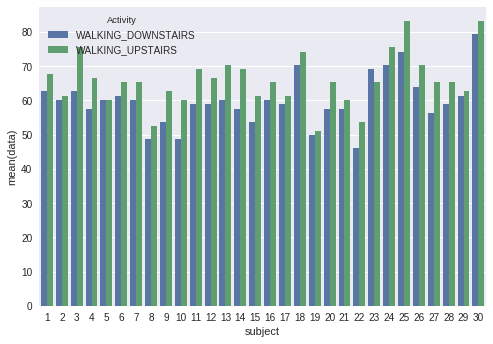

In [0]:
plot_data=(train.loc[label.isin(['WALKING_DOWNSTAIRS' ,'WALKING_UPSTAIRS']),'data' ].groupby([label,Subject_data]).count()*1.28).reset_index()
sns.barplot(x='subject', y= 'data', data=plot_data, hue='Activity')